<a href="https://colab.research.google.com/github/DanyPao/DataScience3-DanielaEsposito/blob/main/IMDB_(Sentiment_analysis)_Entrega_final_DS3_DanielaEsposito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMDB dataset (Sentiment analysis)

Con este dataset proveniente de IMDB, voy a realizar un analisis de sentimientos sobre películas.

Estos textos tienen oraciones largas, de las cuales, muchas de ellas contienen mas de 200 palabras.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
!gdown 1MUq_lWZltYn-VeSld5OyI0LpBjdajNBU

Downloading...
From: https://drive.google.com/uc?id=1MUq_lWZltYn-VeSld5OyI0LpBjdajNBU
To: /content/IMDB dataset (Sentiment analysis)Train.csv
100% 52.7M/52.7M [00:01<00:00, 39.6MB/s]


In [3]:
df=pd.read_csv('IMDB dataset (Sentiment analysis)Train.csv')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
df=df.dropna()

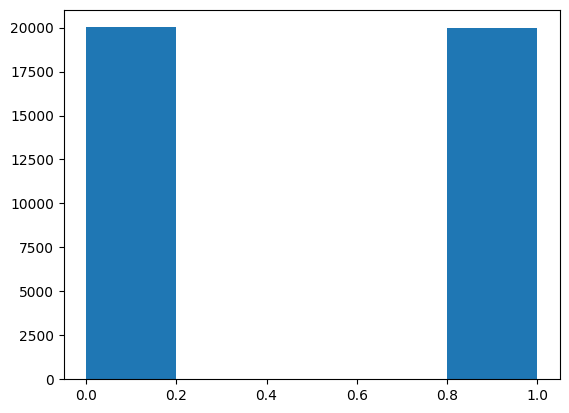

In [5]:
#Verificamos que el dataset esté equilibrado
plt.hist(df['label'], bins=5)
plt.show()

In [6]:
#Separamos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state=42, stratify=df['label'])

In [7]:
#Fiteamos el CountVectorizer a los datos de entrenamiento
vect=CountVectorizer().fit(X_train)



In [8]:
#Transformamos los documentos del training set a un a matriz de documentos-terminos
X_train_vectorized=vect.transform(X_train)
X_train_vectorized

<30000x82525 sparse matrix of type '<class 'numpy.int64'>'
	with 4092373 stored elements in Compressed Sparse Row format>

In [9]:
X_train_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
#Entrenamos el modelo con Regresion Logistica
model=LogisticRegression(max_iter=2500)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=2500)

In [11]:
#Hacemos predicciones sobre el test set
predictions=model.predict(vect.transform(X_test))

In [12]:
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.8809


In [13]:
#Obtenemos los nombres de las features como un array de numpy
feature_names=np.array(vect.get_feature_names_out())

In [14]:
#Ordenamos los coeficientes del modelo
sorted_coef_index=model.coef_[0].argsort()

In [15]:
#Observamos a los 10 coeficientes mas grandes y a los 10 mas chicos
print('Coeficientes menores:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Coeficientes mayores:\n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Coeficientes menores:
['waste' 'worst' 'disappointment' 'mediocre' 'awful' 'fails' 'dreadful'
 'boring' 'uninteresting' 'horrible']

Coeficientes mayores:
['refreshing' 'superb' 'excellent' 'wonderfully' 'entertains' 'unexpected'
 'amazing' 'jackass' 'brilliantly' 'subtle']



In [16]:
#Probamos si puede predecir una reseña positiva o negativa. Recordamos que positiva es 1 y negativa es 0
print (model.predict(vect.transform(['The can´t believe that movie, wasn´t boaring at all'])))
print (model.predict(vect.transform(['I can´t believe that was a movie, was really boaring'])))

[0]
[0]


In [17]:
#No funcionó, por lo tanto debemos agregarle mayor complejidad

In [18]:
#Vamos a probar con N-gramas

In [19]:
vect=CountVectorizer(ngram_range=(1,2)).fit(X_train)


In [20]:
#Transformamos los documentos de trainig set a una matriz de documentos-término
X_train_vectorized=vect.transform(X_train)
X_train_vectorized

<30000x1720009 sparse matrix of type '<class 'numpy.int64'>'
	with 10397462 stored elements in Compressed Sparse Row format>

In [21]:
#Entrenamos el modelo
model=LogisticRegression(max_iter=2500)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=2500)

In [22]:
#Hacemos las predicciones sobre el set de testeo
predictions=model.predict(vect.transform(X_test))
print('Accuracy: ', accuracy_score(y_test, predictions))


Accuracy:  0.9052


In [23]:
#Obtenemos los nombres de las features como un array de numpy
feature_names=np.array(vect.get_feature_names_out())

In [24]:
#Ordenamos a los coeficientes del modelo
sorted_coef_index=model.coef_[0].argsort()

In [25]:
#Observamos a los 10 coeficientes mas grandes y a los 10 mas chicos
print('Coeficientes menores:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Coeficientes mayores:\n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Coeficientes menores:
['worst' 'awful' 'waste' 'boring' 'terrible' 'horrible' 'dull' 'poor'
 'the worst' 'disappointment']

Coeficientes mayores:
['excellent' 'amazing' 'wonderful' 'superb' 'perfect' 'great' 'brilliant'
 'refreshing' 'hilarious' 'not bad']



In [26]:
#Al agregarle complejidad, aparecen bigramas que ayudan a interpretar el sentimiento

In [27]:
#Probamos, nuevamente, si puede predecir una reseña positiva o negativa. Recordamos que positiva es 1 y negativa es 0
print (model.predict(vect.transform(['The can´t believe that movie, wasn´t boaring at all'])))
print (model.predict(vect.transform(['I can´t believe that was a movie, was really boaring'])))

[0]
[0]


In [28]:
#Continua sin funcionar, interpretando ambas reseñas como negativas

In [29]:
#Vamos a probar removiendo stopwords y N-grama.

In [30]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2)).fit(X_train)

In [31]:
X_train_v= vect.fit_transform(X_train)
X_test_v= vect.transform(X_test)

In [32]:
clf= LogisticRegression(max_iter=2500)
clf.fit(X_train_v, y_train)
y_pred= clf.predict(X_test_v)

In [33]:
accuracy= accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8912


In [34]:
#El accuracy disminuyó una vez que se eliminaron los stopwords

In [35]:
#Obtenemos los nombres de las features como un array de numpy
feature_names=np.array(vect.get_feature_names_out())

In [36]:
#Ordenamos los coeficientes del modelo
sorted_coef_index=clf.coef_[0].argsort()

In [37]:
#Observamos a los 10 coeficientes mas grandes y a los 10 mas chicos
print('Coeficientes menores:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Coeficientes mayores:\n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Coeficientes menores:
['worst' 'waste' 'awful' 'boring' 'disappointment' 'horrible'
 'disappointing' 'dull' 'poorly' 'terrible']

Coeficientes mayores:
['excellent' 'amazing' 'wonderful' 'superb' 'refreshing' '10 10' 'perfect'
 'brilliant' 'hilarious' 'fantastic']



In [38]:
#Probamos, nuevamente, si puede predecir una reseña positiva o negativa. Recordamos que positiva es 1 y negativa es 0
print (clf.predict(vect.transform(['The can´t believe that movie, wasn´t boaring at all'])))
print (clf.predict(vect.transform(['I can´t believe that was a movie, was really boaring'])))

[0]
[0]


In [39]:
#Aún continúa sin funcionar, vamos a realizar Stemming